## Covid-19 Outbreak Metric

#### We want to find a metric that quantifies how fast covid-19 is propogating in different countries, relative the population size of the country. We want the relative size because larger countries generally have larger healthcare capacities, so a fast increase in a large country may be less impactful than a slower increase in a smaller country. 

Recent deaths due to Covid-19 are the best basic proxy for number of new cases, although it does involve a time lag of ~2 weeks (a death today is likely due to an infection 2 weeks ago). We will use the percentage of population that died from Coronavirus in the last 3 days (excluding data from the current day, since this is often unreliable). We will express this in terms of deaths per million, since this is a more understandable metric.  

We will source our data from the [European Centre for Disease Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide). 

*Note - This notebook pulls live data from ECDC each day, so the results pulled may not agree with the written text and plot annotations / labels may need to be moved.* 

We start by importing the modules we will use.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns

# Use datetime for date calculations
from datetime import datetime, timedelta
# Use urrlib for error handling with HTTP requests
from urllib.error import HTTPError

Now we read the data into a pandas dataframe. The ECDC updates yesterday's data with todays data at some point during the day. Therefore, we will look for todays data first (the file name includes today's date) and if that gets a HTTP error (because it is has not been made available yet) we will use yesterdays data instead (the file name has yesterdays date).

In [46]:
date_today = datetime.today().strftime('%Y-%m-%d')
date_yesterday = (datetime.today() - timedelta(days = 1)).strftime('%Y-%m-%d')

url_todays_data = 'https://www.ecdc.europa.eu/sites/default/files/documents'
url_todays_data += '/COVID-19-geographic-disbtribution-worldwide-' 
url_todays_data += date_today 
url_todays_data += '.xlsx'

url_yesterdays_data = 'https://www.ecdc.europa.eu/sites/default/files/documents'
url_yesterdays_data += '/COVID-19-geographic-disbtribution-worldwide-' 
url_yesterdays_data += date_yesterday 
url_yesterdays_data += '.xlsx'

try: 
    Data = pd.read_excel(url_todays_data, header=0)  
except (HTTPError, FileNotFoundError):
    Data = pd.read_excel(url_yesterdays_data, header=0)   
    print('Using data from yesterday')

Data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
1,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
2,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0


The ECDC change the column headers on different days, so we will standardise the headers of the columns we need, namely the DateRep, Deaths, Countries and Territories and Pop_Data.2018. We will also remove under scores from the country names to make them look better.

In [47]:
# Rename several columns according to their index and remove underscores from
# the Countries and territories column.  
Data = Data.rename(columns={Data.columns[0]:'DateRep', 
                            Data.columns[5]:"Deaths", 
                            Data.columns[6]:"Countries and territories", 
                            Data.columns[9]:"Pop_Data.2018"})
Data['Countries and territories'] = (Data['Countries and territories']
                                     .str.replace('_',' ')
                                )

We will now check for missing or erronous data before proceeding with analyis.

In [48]:
#increase max rows printed by Pandas so all missing data rows are displayed 
pd.options.display.max_rows = 4000

#view all missing values in dataset
Data[Data.isna().any(axis=1)]      

,DateRep,day,month,year,cases,Deaths,Countries and territories,geoId,countryterritoryCode,Pop_Data.2018
219,2020-03-30,30,3,2020,0,0,Anguilla,AI,NaN,NaN
220,2020-03-29,29,3,2020,0,0,Anguilla,AI,NaN,NaN
221,2020-03-28,28,3,2020,0,0,Anguilla,AI,NaN,NaN
222,2020-03-27,27,3,2020,2,0,Anguilla,AI,NaN,NaN
1354,2020-03-10,10,3,2020,-9,1,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1355,2020-03-02,2,3,2020,0,0,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1356,2020-03-01,1,3,2020,0,0,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1357,2020-02-29,29,2,2020,0,2,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1358,2020-02-28,28,2,2020,0,0,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1359,2020-02-27,27,2,2020,14,0,Cases on an international conveyance Japan,JPG11668,NaN,3000.0


Several countries are missing population data and Country Codes. Only the population data is important for our analysis. The countries missing population data have smal populations, so we will remove these countries from our data. 

In [49]:
#Drop rows which do not include a country population figure 
Data = Data[Data['Pop_Data.2018'].notna()]               

Data[Data.isna().any(axis=1)]     #view all missing values in dataset

,DateRep,day,month,year,cases,Deaths,Countries and territories,geoId,countryterritoryCode,Pop_Data.2018
1354,2020-03-10,10,3,2020,-9,1,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1355,2020-03-02,2,3,2020,0,0,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1356,2020-03-01,1,3,2020,0,0,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1357,2020-02-29,29,2,2020,0,2,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1358,2020-02-28,28,2,2020,0,0,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1359,2020-02-27,27,2,2020,14,0,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1360,2020-02-26,26,2,2020,0,1,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1361,2020-02-25,25,2,2020,0,0,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1362,2020-02-24,24,2,2020,57,1,Cases on an international conveyance Japan,JPG11668,NaN,3000.0
1363,2020-02-23,23,2,2020,0,0,Cases on an international conveyance Japan,JPG11668,NaN,3000.0


Lets calculate some summary statistics to understand our data better and to identify any errors in the data. We are mainly interested in the DateRep, Deaths, Countries and territories and Pop_Data.2018 columns. 

In [50]:
Data.describe(include = 'all')

,DateRep,day,month,year,cases,Deaths,Countries and territories,geoId,countryterritoryCode,Pop_Data.2018
count,7697,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697,7681,7633,7.697000e+03
unique,91,NaN,NaN,NaN,NaN,NaN,194,193,193,NaN
top,2020-03-28 00:00:00,NaN,NaN,NaN,NaN,NaN,Sweden,IT,AUT,NaN
freq,193,NaN,NaN,NaN,NaN,NaN,91,91,91,NaN
first,2019-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-03-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17.453423,2.286215,2019.991295,92.977264,4.362609,NaN,NaN,NaN,6.966711e+07
std,NaN,8.570876,1.235964,0.092898,695.190439,40.404293,NaN,NaN,NaN,2.112276e+08
min,NaN,1.000000,1.000000,2019.000000,-9.000000,0.000000,NaN,NaN,NaN,1.000000e+03
25%,NaN,11.000000,1.000000,2020.000000,0.000000,0.000000,NaN,NaN,NaN,4.137309e+06


We have no missing values for the columns we are interested in and the min and max values look reasonable (e.g. no negative or huge numbers). 

Next, we will check that the values in each column are as expected. Firstly, we'll get an overview of the data types in the dataframe.  

In [51]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7697 entries, 0 to 7709
Data columns (total 10 columns):
DateRep                      7697 non-null datetime64[ns]
day                          7697 non-null int64
month                        7697 non-null int64
year                         7697 non-null int64
cases                        7697 non-null int64
Deaths                       7697 non-null int64
Countries and territories    7697 non-null object
geoId                        7681 non-null object
countryterritoryCode         7633 non-null object
Pop_Data.2018                7697 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 661.5+ KB


If all entries in a column are of the same data type, then the column will be of that type e.g. if all entries are 'int 64' then the column will be 'int 64'. Mixed datatypes e.g. strings and integers will result in a column of data type 'object'. String only columns also have data type 'object'. 

Looking at our result, we see all the entries in DatRep are dates and entries in Deaths and Pop_Data.2018 are floats or ints, this is a good sign. 

Next we will check that the dates all fall within the expected time period (not before december 2019 and not after todays date). The dates are technically datetimes, we don't want the time stamp data, so we will also convert these to pure dates. This will help us identify the last 3 days later on. 

In [52]:
# Print latest and oldest dates
print('Most recent date:', Data['DateRep'].max(),
      'Oldest Date:', Data['DateRep'].min()) 

# Convert datetimes to dates (removes timestamp), will raise error for non-date object
Data['DateRep'] = Data['DateRep'].dt.date    

Most recent date: 2020-03-30 00:00:00 Oldest Date: 2019-12-31 00:00:00


We will do a quick check on the Deaths, Pop_Data.2018 and Countries and territories columns to check for sure that they only contain a single data type (e.g. check there are no integers in the Countries column). 

In [53]:
# Check all entries in 'Countries and territories' are strings
Data[Data['Countries and territories'].map(type) != str]   

# Check all entries in 'Deaths' are integers
Data[Data['Deaths'].map(type) != int]             

# Check all entries in 'Pop_Data.2018' are floats
Data[Data['Pop_Data.2018'].map(type) != float]    

,DateRep,day,month,year,cases,Deaths,Countries and territories,geoId,countryterritoryCode,Pop_Data.2018


Nothing is returned, which means there are no mixed datatypes, so we are ready to start analysing the data. 


### Data Analysis

We will now create a list showing the last 3 days that we want to use in our metric. 

In [54]:
#import datetime   - - -  - - - - - - - - - - - - - - add schpeel to cheat sheet on import vs FROM x import blah...
current_date = datetime.today()
last_three_days=[]

for day in range(1,4):
    last_three_days.append((current_date - timedelta(days=day)).date())
                          
last_three_days

[datetime.date(2020, 3, 29),
 datetime.date(2020, 3, 28),
 datetime.date(2020, 3, 27)]

Now we group our data by country and list the population and sum of deaths over the last 3 days for each country. We will do this in 3 parts. 

1. Create a dataframe that selects the most common (mode) country population for each country - in case an error has been made in one of the country population entries we will take the most common population i.e. the most likely to be correct value. 
2. Create a dataframe that takes only entries from the last 3 days and sums the deaths over this time per country. We do this seperately from above because by excluding rows outside of the last 3 days would also exclude most population entries and thus make it more likely that we take an erronous population figure. 
3. Merge the 2 dataframes into a single dataframe with all the data we need. 

We will also add a check to see whether countries are included in the population dataframe but excluded from the deaths in the last three days dataframe. This will help us spot any errors. 

In [55]:
# Returns most common population per country 
# (in case a country pop is entered incorrectly)
country_pops = (Data.groupby(['Countries and territories']) 
                ['Pop_Data.2018'].agg(pd.Series.mode)
            )

# Returns sum of deaths over the last 3 days per country 
data_from_last_three_days = Data[Data['DateRep'].isin(last_three_days)]
country_last_three_days_death = (data_from_last_three_days 
                                 .groupby(['Countries and territories']) 
                                 ['Deaths'].sum() 
                            )

# Prints number of rows in each dataframe and identifies any countries that 
# are in country_pops but are not in country_last_three_days_death. 
print(len(country_pops), len(country_last_three_days_death))   
country_pops[~country_pops.keys().isin(country_last_three_days_death.keys())]  #(notice the tilda for NOT in)

194 193


Countries and territories
Cases on an international conveyance Japan    3000.0
Name: Pop_Data.2018, dtype: float64

In [56]:
# Combine the country_pops and country_last_three_days_death and rename 
# the Deaths column to 'Deaths in last 3 days'.
Metric = pd.merge(country_pops, country_last_three_days_death, how='inner',
                  left_index=True, right_index=True, validate='1:1')   
Metric = Metric.rename(columns={"Deaths":"Deaths in last 3 days"})      

Metric.head()

,Pop_Data.2018,Deaths in last 3 days
Countries and territories,,
Afghanistan,37172386.0,2
Albania,2866376.0,5
Algeria,42228429.0,9
Andorra,77006.0,4
Angola,30809762.0,0


Now we have the data we need in the correct format, we can easly calculate our metric and sort the dataframe according to our metric: 

In [57]:
Metric['Deaths per million due to Corona in last 3 days'] = (
    (Metric['Deaths in last 3 days'] / Metric['Pop_Data.2018']) * 1000000
)
Metric = Metric.sort_values(
    by='Deaths per million due to Corona in last 3 days',
    ascending=False
)

# The 'group by' made the country column an index. This line makes 
# country a column again (adds a new column) and resets the index to
# numbered rows. 
Metric = Metric.reset_index() 

Metric.head()

,Countries and territories,Pop_Data.2018,Deaths in last 3 days,Deaths per million due to Corona in last 3 days
0,Andorra,77006.0,4,51.944004
1,Spain,46723749.0,2256,48.283797
2,Italy,60431283.0,2518,41.667161
3,San Marino,33785.0,1,29.598934
4,Luxembourg,607728.0,10,16.454730


### Plotting Results

We will plot our metric in a barplot. There are a lot of countries, so taking all of them would look messy, plus in most cases the coronavirus outbreak is very small, so we will concentrate only on large countries (more than 1 million citizens) and only on the top 20, since this metric is about comparing the worst hit countries. 

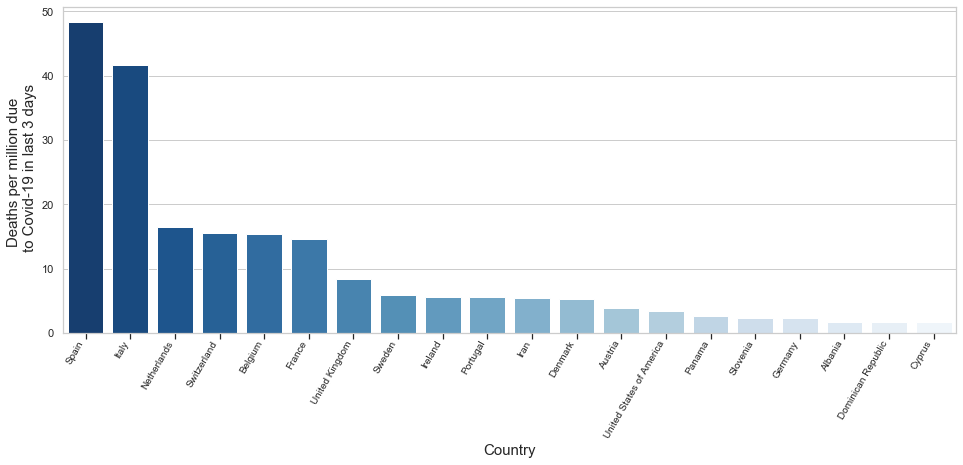

In [58]:
countries_pop_over_one_million = Metric[Metric['Pop_Data.2018']>1000000]
top_20_countries = (
    countries_pop_over_one_million
    .nlargest
        (
            20,
            'Deaths per million due to Corona in last 3 days'
        ) 
    ['Countries and territories']
)                   
metric_top_20 = (
    countries_pop_over_one_million
    .nlargest
        (
            20,
            'Deaths per million due to Corona in last 3 days'
        ) 
    ['Deaths per million due to Corona in last 3 days']
)

# Plot metric for the top 20 countries in barplot
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
plot = sns.barplot(x=top_20_countries, y=metric_top_20, palette="Blues_r")
plot.set_ylabel('Deaths per million due \n to Covid-19 in last 3 days', 
                fontweight='light', size=15)                                                     
plot.set_xlabel('Country', fontweight='light', size=15)                                                     
plot.tick_params(axis='x',pad=0, direction='out', bottom=True)
plot.set_xticklabels(
    plot.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=10
)

plt.savefig('Corona.pdf', dpi=300, bbox_inches='tight')

We can also plot how our metric changed over the last 10 days. For simplicity, we will modify our metric to find the number of deaths per million people for each day, rather than over a 3 day period. We will be using the original dataframe 'Data' for these plots. Firstly, we will remove all data that is older than the last 10 days and as before we will remove countries will populations less than 1 million. 

We will also define the countries we wish to highlight in the plots and make a seperate dataframe with just the data from these countries. 

In [59]:
# Add column to Data containg the metric 
Data['Metric'] = Data['Deaths'] / Data['Pop_Data.2018'] * 1000000

# Only include data from last 10 days
date_10_days_ago = (current_date - timedelta(days=10)).date()
data_plot = Data[Data['DateRep'] >= date_10_days_ago]
data_plot = data_plot[data_plot['Pop_Data.2018'] > 1000000]

# List of countries to highlight on plot 
country_highlights = ['France',
                      'Italy',
                      'United Kingdom',
                      'Spain',
                      'United States of America',
                ]

data_plot_highlight = data_plot[data_plot['Countries and territories']
                     .isin(country_highlights)]

Now we will plot the data as a line graph, greying out the countries we don't wish to highlight and highlighting the ones we do. 

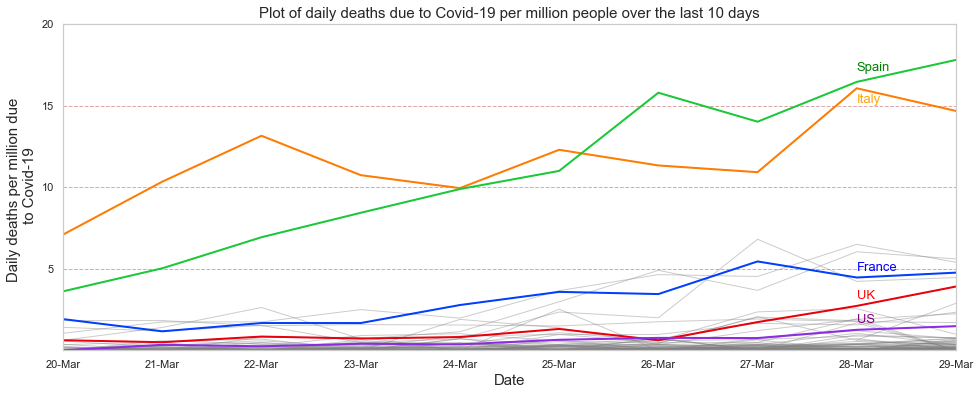

In [60]:
# Get count of unique countries to plot, 
# this gives number of lines to plot
list_of_countries = data_plot['Countries and territories'].unique().tolist()
num_of_countries = len(list_of_countries)

# Create list that sets colour of each line in plot,
# fill each entry in list as 'grey' to grey out all lines in plot
col = ['gray'] * num_of_countries

# Plot line graph of metric, with all lines greyed out
plt.figure(figsize=(16, 6))
plot1 = sns.lineplot(x = data_plot['DateRep'], 
                     y = data_plot['Metric'], 
                     hue = data_plot['Countries and territories'], 
                     legend = False, 
                     linewidth = 1, 
                     alpha = 0.4, 
                     palette = col)

# Overlay plot with the highlighted countries so they stand out
plot2 = sns.lineplot(x = data_plot_highlight['DateRep'], 
                     y = data_plot['Metric'], 
                     hue = data_plot_highlight['Countries and territories'], 
                     linewidth = 2,
                     palette = 'bright',
                     legend = False)

# We want labels for the highlighted country placed at 2 
# days ago on the plot. Firstly we get the date 2 days ago 
# from the last_three_days list then filter on that date 
two_days_ago = last_three_days[1]
data_label = data_plot[data_plot['DateRep'] == two_days_ago]

# Now we get the value of the metric 2 days ago for each country
spain_label_height = (
    data_label[data_label['Countries and territories']== 'Spain']['Metric'])
Italy_label_height = (
    data_label[data_label['Countries and territories']== 'Italy']['Metric'])
France_label_height = (
    data_label[data_label['Countries and territories']== 'France']['Metric'])
UK_label_height = (
    data_label[data_label['Countries and territories']== 'United Kingdom']['Metric'])
US_label_height = (
    data_label[data_label['Countries and territories']== 'United States of America']['Metric'])

# Add the label to 2 days ago position on plot slighly above or 
# below the metric value (add or subtract 1 or 2)
plot2.text(two_days_ago, 0.7 + spain_label_height,'Spain', color='green', size = 13)
plot2.text(two_days_ago, -0.9 + Italy_label_height,'Italy', color='orange', size = 13)
plot2.text(two_days_ago, 0.4 + France_label_height,'France', color='blue', size = 13)
plot2.text(two_days_ago, 0.4 + UK_label_height,'UK', color='red', size = 13)
plot2.text(two_days_ago, 0.4 + US_label_height,'US', color='purple', size = 13)

# Set plot / axis styles and labels  
plot2.set_ylabel('Daily deaths per million due \n to Covid-19', 
                 fontweight='light', size=15) 
plot2.set_xlabel('Date', fontweight='light', size=15) 
plot2.set_title('Plot of daily deaths due to Covid-19 '
    + 'per million people over the last 10 days', size = 15)
plt.xlim(date_10_days_ago,last_three_days[0])
plt.ylim(0)
myFmt = mdates.DateFormatter('%d-%b')
plot2.xaxis.set_major_formatter(myFmt)
plot2.grid(axis='y', color='brown', linewidth=1, linestyle='--', alpha=0.4)
plot2.grid(axis='x', b=False)
sns.set(style="whitegrid")
plot2.set_yticks([5,10, 15, 20])
plot2.get_yaxis().set_major_formatter(ticker.ScalarFormatter())

plt.savefig('Metric_10_days.pdf', dpi=300, bbox_inches='tight')

Spain and Italy have much higher values, which suppresses the curves of other countries on the graph. We can plot using a log scale to get a better view of these countries. We will need to remove days where 0 deaths were reported, since these end up making thick vertical lines in the log plot. 

In [61]:
# Remove entries from plot data where Deaths = 0
data_plot_log = data_plot[data_plot['Deaths'] > 0]
data_plot_log_highlight = data_plot_highlight[
    data_plot_highlight['Deaths'] > 0
]

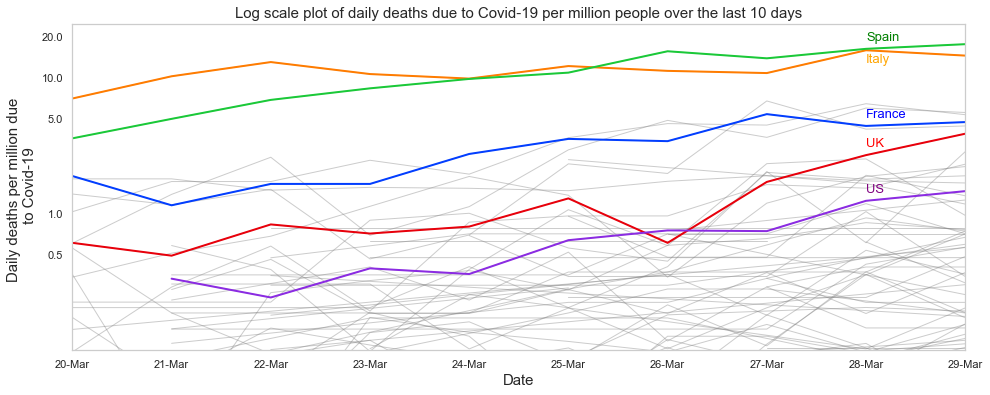

In [62]:
# Get count of unique countries to plot, 
# this gives number of lines to plot
list_of_countries_log = (data_plot_log['Countries and territories']
                         .unique()
                         .tolist()
                    )
num_of_countries_log = len(list_of_countries_log)

# Create list that sets colour of each line in plot,
# fill each entry in list as 'grey' to grey out all lines in plot
col_log = ['gray'] * num_of_countries_log

# Plot line graph of metric, with all lines greyed out
plt.figure(figsize=(16, 6))
plot1 = sns.lineplot(x = data_plot_log['DateRep'], 
                     y = data_plot_log['Metric'], 
                     hue = data_plot_log['Countries and territories'], 
                     legend = False, 
                     linewidth = 1, 
                     alpha = 0.4, 
                     palette = col_log)

# Overlay plot with the highlighted countries so they stand out
plot2 = sns.lineplot(x = data_plot_log_highlight['DateRep'], 
                     y = data_plot_log['Metric'], 
                     hue = data_plot_log_highlight['Countries and territories'], 
                     linewidth = 2,
                    palette = 'bright',
                    legend = False)

# We want labels for the highlighted country placed at 2 
# days ago on the plot. Firstly we get the date 2 days ago 
# from the last_three_days list then filter on that date 
two_days_ago = last_three_days[1]
data_label_log = data_plot_log[data_plot_log['DateRep'] == two_days_ago]

# Now we get the value of the metric 2 days ago for each country
spain_label_height = data_label_log[data_label_log['Countries and territories']== 'Spain']['Metric']
Italy_label_height = data_label_log[data_label_log['Countries and territories']== 'Italy']['Metric']
France_label_height = data_label_log[data_label_log['Countries and territories']== 'France']['Metric']
UK_label_height = data_label_log[data_label_log['Countries and territories']== 'United Kingdom']['Metric']
US_label_height = data_label_log[data_label_log['Countries and territories']== 'United States of America']['Metric']

# Add the label to 2 days ago position on plot slighly above or 
# below the metric value (multiply by a small faction above or below 1)
plot2.text(two_days_ago, 1.15 * spain_label_height,'Spain', color='green', size = 13)
plot2.text(two_days_ago, 0.8 * Italy_label_height,'Italy', color='orange', size = 13)
plot2.text(two_days_ago, 1.15 * France_label_height,'France', color='blue', size = 13)
plot2.text(two_days_ago, 1.15 * UK_label_height,'UK', color='red', size = 13)
plot2.text(two_days_ago, 1.15 * US_label_height,'US', color='purple', size = 13)

# Set plot / axis styles and labels, including logging the scale  
plot2.set_ylabel('Daily deaths per million due \n to Covid-19', 
                fontweight='light', size=15) 
plot2.set_xlabel('Date', fontweight='light', size=15) 
plot2.set_title('Log scale plot of daily deaths due to Covid-19 '
    + 'per million people over the last 10 days', size = 15)
plt.xlim(date_10_days_ago,last_three_days[0])
plt.ylim(0.1,25)
myFmt = mdates.DateFormatter('%d-%b')
plot2.xaxis.set_major_formatter(myFmt)
plot2.grid(False)
plot2.set(yscale='log')
plot2.set_yticks([0.5, 1, 5, 10, 20])
plot2.get_yaxis().set_major_formatter(ticker.ScalarFormatter())

plt.savefig('Metric_10_days_log.pdf', dpi=300, bbox_inches='tight')